# Asset Management - Homework 01

by  
**Aritra Chowdhury (ac79277)**  
**Lydia Wang (lw28423)**  
**Matthew Tran (mct2345)**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from datetime import datetime
import warnings
warnings.filterwarnings(action = 'ignore')

## S&P 500 (Standard & Poor's 500 Index) Tracker

### Data Reading and Preprocessing

Read S&P 500 Index Daily Data

In [2]:
# S&P 500 Daily Data (10 years)

df_sp500 = pd.read_csv('S&P_500_Index_Data.csv')
df_sp500 = df_sp500[df_sp500['caldt'] >= 20101231].reset_index()
init_sp500_index = df_sp500['spindx'][0]
df_sp500 = df_sp500[df_sp500['caldt'] >= 20110101].reset_index()
df_sp500['caldt'] = pd.to_datetime(df_sp500['caldt'].apply(str), format='%Y%m%d')

df_sp500.tail()

,level_0,index,caldt,vwretd,vwretx,ewretd,ewretx,totval,totcnt,usdval,usdcnt,spindx,sprtrn
2512,2513,2534,2020-12-24,0.003623,0.003520,0.002365,0.002262,3.269030e+10,505,3.257564e+10,505,3703.06,0.003537
2513,2514,2535,2020-12-28,0.008938,0.008938,0.002918,0.002918,3.298247e+10,505,3.269030e+10,505,3735.36,0.008723
2514,2515,2536,2020-12-29,-0.002240,-0.002240,-0.004992,-0.004992,3.290859e+10,505,3.298247e+10,505,3727.04,-0.002227
2515,2516,2537,2020-12-30,0.001475,0.001364,0.006731,0.006487,3.295347e+10,505,3.290859e+10,505,3732.04,0.001342
2516,2517,2538,2020-12-31,0.006367,0.006290,0.007515,0.007359,3.316123e+10,505,3.295347e+10,505,3756.07,0.006439


Read Daily Data for all Stocks

In [3]:
# Daily Stock Data (10 years)

df_daily_stocks = pd.read_csv('Daily_Stock_Data.csv')
df_daily_stocks.tail()

,PERMNO,date,SHRCD,EXCHCD,TICKER,COMNAM,PERMCO,DIVAMT,PRC,SHROUT,CFACPR,CFACSHR,vwretd,ewretd,sprtrn
9376438,93436,20201224,11,3,TSLA,TESLA INC,53453,NaN,661.77002,947901.0,1.0,1.0,0.002332,-0.000277,0.003537
9376439,93436,20201228,11,3,TSLA,TESLA INC,53453,NaN,663.69000,947901.0,1.0,1.0,0.003870,0.001350,0.008723
9376440,93436,20201229,11,3,TSLA,TESLA INC,53453,NaN,665.98999,947901.0,1.0,1.0,-0.003649,-0.008483,-0.002227
9376441,93436,20201230,11,3,TSLA,TESLA INC,53453,NaN,694.78003,947901.0,1.0,1.0,0.003281,0.010155,0.001342
9376442,93436,20201231,11,3,TSLA,TESLA INC,53453,NaN,705.66998,947901.0,1.0,1.0,0.003556,-0.001058,0.006439


Read Daily Data for chosen comparison ETF

Comparison ETF: **Vanguard S&P 500 ETF (VOO)**

In [4]:
df_voo_sp500_etf = pd.read_csv('VOO_Stock_Data_SP500_ETF.csv')

df_voo_sp500_etf['Adjusted_Price'] = abs(df_voo_sp500_etf['PRC']) / df_voo_sp500_etf['CFACPR']
df_voo_sp500_etf['Adjusted_Shares'] = df_voo_sp500_etf['SHROUT'] * df_voo_sp500_etf['CFACSHR']
df_voo_sp500_etf['Market_Cap'] = df_voo_sp500_etf['Adjusted_Price'] * df_voo_sp500_etf['Adjusted_Shares']
df_voo_sp500_etf['Prev_Adjusted_Price'] = df_voo_sp500_etf.groupby('TICKER')['Adjusted_Price'].shift(1)
df_voo_sp500_etf['VOO_Return'] = (df_voo_sp500_etf['Adjusted_Price'] / df_voo_sp500_etf['Prev_Adjusted_Price']) - 1 

df_voo_sp500_etf = df_voo_sp500_etf[df_voo_sp500_etf['date'] >= 20110101]
df_voo_sp500_etf['date'] = pd.to_datetime(df_voo_sp500_etf['date'].apply(str), format='%Y%m%d')

df_voo_sp500_etf.tail()

,PERMNO,date,SHRCD,EXCHCD,TICKER,COMNAM,PERMCO,DIVAMT,PRC,SHROUT,CFACPR,CFACSHR,vwretd,ewretd,sprtrn,Adjusted_Price,Adjusted_Shares,Market_Cap,Prev_Adjusted_Price,VOO_Return
2513,12305,2020-12-24,73,4,VOO,VANGUARD INDEX FUNDS,41593,NaN,339.16000,533142,1.0,1.0,0.002332,-0.000277,0.003537,339.16000,533142.0,1.808204e+08,337.81000,0.003996
2514,12305,2020-12-28,73,4,VOO,VANGUARD INDEX FUNDS,41593,NaN,342.10999,533142,1.0,1.0,0.003870,0.001350,0.008723,342.10999,533142.0,1.823932e+08,339.16000,0.008698
2515,12305,2020-12-29,73,4,VOO,VANGUARD INDEX FUNDS,41593,NaN,341.39001,533142,1.0,1.0,-0.003649,-0.008483,-0.002227,341.39001,533142.0,1.820094e+08,342.10999,-0.002105
2516,12305,2020-12-30,73,4,VOO,VANGUARD INDEX FUNDS,41593,NaN,341.85001,533142,1.0,1.0,0.003281,0.010155,0.001342,341.85001,533142.0,1.822546e+08,341.39001,0.001347
2517,12305,2020-12-31,73,4,VOO,VANGUARD INDEX FUNDS,41593,NaN,343.69000,517944,1.0,1.0,0.003556,-0.001058,0.006439,343.69000,517944.0,1.780122e+08,341.85001,0.005382


Read Daily Data for chosen comparison Mutual Fund

Comparison ETF: **Vanguard 500 Index Fund Admiral Shares (VFIAX)**

In [5]:
df_vfiax_sp500_mf = pd.read_csv('VFIAX_Stock_Data_SP500_MF.csv')

df_vfiax_sp500_mf['Prev_Adjusted_Close'] = df_vfiax_sp500_mf['Adj Close'].shift(1)
df_vfiax_sp500_mf['VFIAX_Return'] = (df_vfiax_sp500_mf['Adj Close'] / df_vfiax_sp500_mf['Prev_Adjusted_Close']) - 1 

df_vfiax_sp500_mf = df_vfiax_sp500_mf[df_vfiax_sp500_mf['Date'] >= '2011-01-01']
df_vfiax_sp500_mf['Date'] = pd.to_datetime(df_vfiax_sp500_mf['Date'])

df_vfiax_sp500_mf.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,Prev_Adjusted_Close,VFIAX_Return
2512,2020-12-23,340.380005,340.380005,340.380005,340.380005,338.046600,0,337.788391,0.000764
2513,2020-12-24,341.619995,341.619995,341.619995,341.619995,339.278107,0,338.046600,0.003643
2514,2020-12-28,344.600006,344.600006,344.600006,344.600006,342.237701,0,339.278107,0.008723
2515,2020-12-29,343.829987,343.829987,343.829987,343.829987,341.472961,0,342.237701,-0.002235
2516,2020-12-30,344.329987,344.329987,344.329987,344.329987,341.969543,0,341.472961,0.001454


Calculate Adjusted Price, Adjusted Shares, Market Cap and Returns

In [6]:
df_daily_stocks['day'] = df_daily_stocks['date'] % 100
df_daily_stocks['month'] = ((df_daily_stocks['date'] % 10000) / 100).astype(int)
df_daily_stocks['year'] = ((df_daily_stocks['date'] % 100000000) / 10000).astype(int)

# calculating Adjusted Price, Shares, Market Cap and Return
df_daily_stocks['Adjusted_Price'] = abs(df_daily_stocks['PRC']) / df_daily_stocks['CFACPR']
df_daily_stocks['Adjusted_Shares'] = df_daily_stocks['SHROUT'] * df_daily_stocks['CFACSHR']
df_daily_stocks['Market_Cap'] = df_daily_stocks['Adjusted_Price'] * df_daily_stocks['Adjusted_Shares']
df_daily_stocks['Prev_Adjusted_Price'] = df_daily_stocks.groupby('TICKER')['Adjusted_Price'].shift(1)
df_daily_stocks['Return'] = (df_daily_stocks['Adjusted_Price'] / df_daily_stocks['Prev_Adjusted_Price']) - 1 

df_daily_stocks.tail()

,PERMNO,date,SHRCD,EXCHCD,TICKER,COMNAM,PERMCO,DIVAMT,PRC,SHROUT,...,ewretd,sprtrn,day,month,year,Adjusted_Price,Adjusted_Shares,Market_Cap,Prev_Adjusted_Price,Return
9376438,93436,20201224,11,3,TSLA,TESLA INC,53453,NaN,661.77002,947901.0,...,-0.000277,0.003537,24,12,2020,661.77002,947901.0,6.272925e+08,645.97998,0.024444
9376439,93436,20201228,11,3,TSLA,TESLA INC,53453,NaN,663.69000,947901.0,...,0.001350,0.008723,28,12,2020,663.69000,947901.0,6.291124e+08,661.77002,0.002901
9376440,93436,20201229,11,3,TSLA,TESLA INC,53453,NaN,665.98999,947901.0,...,-0.008483,-0.002227,29,12,2020,665.98999,947901.0,6.312926e+08,663.69000,0.003465
9376441,93436,20201230,11,3,TSLA,TESLA INC,53453,NaN,694.78003,947901.0,...,0.010155,0.001342,30,12,2020,694.78003,947901.0,6.585827e+08,665.98999,0.043229
9376442,93436,20201231,11,3,TSLA,TESLA INC,53453,NaN,705.66998,947901.0,...,-0.001058,0.006439,31,12,2020,705.66998,947901.0,6.689053e+08,694.78003,0.015674


### Reconstitution (Annually) and Rebalancing (Quarterly)

Functions to Reconstitue Annually and Get Weighted Returns for each Date

In [7]:
# find top 200 companies at the end of the parameter year, to be used for the next year
def reconstitute_company_list(df, yr):
    df_date = df[(df['year'] == yr) & (df['month'] == 12)]
    max_day = df_date.sort_values(by = ['date'], ascending = False).iloc[0]['day']
    df_date = df_date[df_date['day'] == max_day]
    df_date = df_date.sort_values(by = ['Market_Cap'], ascending = False)[:500]
    company_list = df_date['TICKER'].tolist()
    return company_list

# get market cap weights and the corresponding weighted returns of the reconstituted companies at the parameter date, to be used for the next quarter
def get_weighted_return(df, list_comp, dt):
    df_comp = df[(df['TICKER'].isin(list_comp)) & (df['date'] == dt)]
    df_market_cap_sum = df_comp.groupby('date')['Market_Cap'].sum().to_frame().reset_index().rename(columns={'Market_Cap': 'Market_Cap_Sum'})
    df_merged = df_comp.merge(df_market_cap_sum, left_on = 'date', right_on = 'date')
    df_merged['Ticker_Weight'] = df_merged['Market_Cap'] / df_merged['Market_Cap_Sum']
    
    weighted_return = sum(df_merged['Ticker_Weight'].fillna(0) * df_merged['Return'].fillna(0))
    weighted_market_cap = sum(df_merged['Ticker_Weight'] * df_merged['Market_Cap'])
    
    return weighted_return, weighted_market_cap

Rebalance Weights every Quarter and calculate Reconstitution and Weighted Returns using above functions

In [8]:
df_dates = df_daily_stocks[['date', 'day', 'month', 'year']].drop_duplicates()
df_max_day = df_dates.groupby(['year', 'month'])['day'].max().to_frame().reset_index().rename(columns = {'day': 'max_day_of_month'})
df_dates = df_dates.merge(df_max_day, left_on = ['year', 'month'], right_on = ['year', 'month'])
# df_dates

df_port_returns = pd.DataFrame(columns = ['Date', 'Portfolio_Return', 'Portfolio_Market_Cap'])

for i in range(0, len(df_dates)):
    
    if df_dates['month'][i] == 12 and df_dates['day'][i] == df_dates['max_day_of_month'][i]:
        top_constituents = reconstitute_company_list(df_daily_stocks, df_dates['year'][i])
        df_calc = df_daily_stocks[(df_daily_stocks['year'] == df_dates['year'][i] + 1) & (df_daily_stocks['month'].between(1, 3, inclusive = True))]
        df_calc_dates = df_calc['date'].unique().tolist()
        
        for j in range(0, len(df_calc_dates)):
            weighted_return, weighted_market_cap = get_weighted_return(df_calc, top_constituents, df_calc_dates[j])
            df_port_returns.loc[len(df_port_returns)] = [df_calc_dates[j], weighted_return, weighted_market_cap]
    
    if (df_dates['month'][i] == 3 or df_dates['month'][i] == 6 or df_dates['month'][i] == 9) and df_dates['day'][i] == df_dates['max_day_of_month'][i]:
        df_calc = df_daily_stocks[(df_daily_stocks['year'] == df_dates['year'][i]) & (df_daily_stocks['month'].between(df_dates['month'][i]+1, df_dates['month'][i]+3, inclusive = True))]
        df_calc_dates = df_calc['date'].unique().tolist()
        
        for j in range(0, len(df_calc_dates)):
            weighted_return, weighted_market_cap = get_weighted_return(df_calc, top_constituents, df_calc_dates[j])
            df_port_returns.loc[len(df_port_returns)] = [df_calc_dates[j], weighted_return, weighted_market_cap]
            
df_port_returns['Date'] = pd.to_datetime(df_port_returns['Date'].apply(str), format='%Y%m%d')

### Return, Index, and Return Error Calculation

Calculate Returns and Return Errors for each date

In [9]:
df_returns = df_port_returns.merge(df_sp500, left_on = 'Date', right_on = 'caldt')[['Date', 'Portfolio_Return', 'sprtrn']].rename(columns = {'sprtrn': 'S&P_500_Return'})
df_returns = df_returns.merge(df_voo_sp500_etf, left_on = 'Date', right_on = 'date')[['Date', 'Portfolio_Return', 'S&P_500_Return', 'VOO_Return']]
df_returns = df_returns.merge(df_vfiax_sp500_mf, left_on = 'Date', right_on = 'Date')[['Date', 'Portfolio_Return', 'S&P_500_Return', 'VOO_Return', 'VFIAX_Return']]
df_returns['S&P_500_Return_Error'] = df_returns['Portfolio_Return'] - df_returns['S&P_500_Return']
df_returns['VOO_Return_Error'] = df_returns['Portfolio_Return'] - df_returns['VOO_Return']
df_returns['VFIAX_Return_Error'] = df_returns['Portfolio_Return'] - df_returns['VFIAX_Return']
df_returns['Year'] = df_returns['Date'].dt.year
df_returns

,Date,Portfolio_Return,S&P_500_Return,VOO_Return,VFIAX_Return,S&P_500_Return_Error,VOO_Return_Error,VFIAX_Return_Error,Year
0,2011-01-03,0.011195,0.011315,0.009380,0.011309,-0.000120,0.001815,-0.000115,2011
1,2011-01-04,-0.000727,-0.001313,-0.000860,-0.001280,0.000586,0.000133,0.000553,2011
2,2011-01-05,0.005094,0.005007,0.005339,0.005129,0.000087,-0.000245,-0.000034,2011
3,2011-01-06,-0.001655,-0.002123,-0.001713,-0.001786,0.000468,0.000058,0.000131,2011
4,2011-01-07,-0.001887,-0.001845,-0.002008,-0.001789,-0.000042,0.000121,-0.000098,2011
...,...,...,...,...,...,...,...,...,...
2511,2020-12-23,0.000492,0.000746,0.000800,0.000764,-0.000254,-0.000308,-0.000272,2020
2512,2020-12-24,0.003383,0.003537,0.003996,0.003643,-0.000154,-0.000614,-0.000260,2020
2513,2020-12-28,0.008131,0.008723,0.008698,0.008723,-0.000592,-0.000567,-0.000592,2020
2514,2020-12-29,-0.001896,-0.002227,-0.002105,-0.002235,0.000331,0.000209,0.000339,2020


Add Index Values for each Portfolio / Index for every date. They all begin at an Index value of 1000 (all indexes are scaled). 

In [10]:
sp_index = []
port_index = []
voo_index = []
vfiax_index = []

for i in range(0, len(df_returns)):
    if i == 0:
        sp_index.append(1000)
        port_index.append(1000)
        voo_index.append(1000)
        vfiax_index.append(1000)
    else:
        sp_index.append(sp_index[i-1]*(1+df_returns['S&P_500_Return'][i]))
        port_index.append(port_index[i-1]*(1+df_returns['Portfolio_Return'][i]))
        voo_index.append(voo_index[i-1]*(1+df_returns['VOO_Return'][i]))
        vfiax_index.append(vfiax_index[i-1]*(1+df_returns['VFIAX_Return'][i]))

df_returns['S&P_500_Index'] = sp_index
df_returns['Portfolio_Index'] = port_index
df_returns['VOO_Index'] = voo_index
df_returns['VFIAX_Index'] = vfiax_index

df_returns

,Date,Portfolio_Return,S&P_500_Return,VOO_Return,VFIAX_Return,S&P_500_Return_Error,VOO_Return_Error,VFIAX_Return_Error,Year,S&P_500_Index,Portfolio_Index,VOO_Index,VFIAX_Index
0,2011-01-03,0.011195,0.011315,0.009380,0.011309,-0.000120,0.001815,-0.000115,2011,1000.000000,1000.000000,1000.000000,1000.000000
1,2011-01-04,-0.000727,-0.001313,-0.000860,-0.001280,0.000586,0.000133,0.000553,2011,998.687000,999.272892,999.139563,998.719572
2,2011-01-05,0.005094,0.005007,0.005339,0.005129,0.000087,-0.000245,-0.000034,2011,1003.687426,1004.363679,1004.474273,1003.841589
3,2011-01-06,-0.001655,-0.002123,-0.001713,-0.001786,0.000468,0.000058,0.000131,2011,1001.556597,1002.701648,1002.753399,1002.048532
4,2011-01-07,-0.001887,-0.001845,-0.002008,-0.001789,-0.000042,0.000121,-0.000098,2011,999.708725,1000.809495,1000.739976,1000.256115
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2511,2020-12-23,0.000492,0.000746,0.000800,0.000764,-0.000254,-0.000308,-0.000272,2020,2901.254878,4959.629808,2906.642574,3549.621136
2512,2020-12-24,0.003383,0.003537,0.003996,0.003643,-0.000154,-0.000614,-0.000260,2020,2911.516617,4976.405978,2918.258475,3562.552440
2513,2020-12-28,0.008131,0.008723,0.008698,0.008723,-0.000592,-0.000567,-0.000592,2020,2936.913776,5016.868895,2943.641284,3593.629331
2514,2020-12-29,-0.001896,-0.002227,-0.002105,-0.002235,0.000331,0.000209,0.000339,2020,2930.373269,5007.358543,2937.446309,3585.599263


### Portfolio Index Comparison

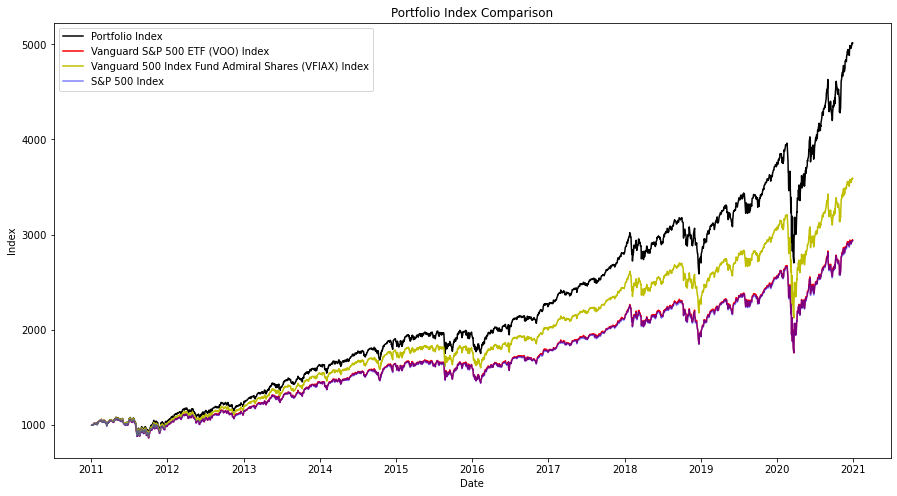

In [11]:
fig, (ax) = plt.subplots(nrows = 1, ncols = 1, figsize = (15,8))

ax.plot(df_returns['Date'], df_returns['Portfolio_Index'], color = 'black', label = 'Portfolio Index')
ax.plot(df_returns['Date'], df_returns['VOO_Index'], color = 'r', label = 'Vanguard S&P 500 ETF (VOO) Index')
ax.plot(df_returns['Date'], df_returns['VFIAX_Index'], color = 'y', label = 'Vanguard 500 Index Fund Admiral Shares (VFIAX) Index')
ax.plot(df_returns['Date'], df_returns['S&P_500_Index'], color = 'b', alpha = 0.5, label = 'S&P 500 Index')
ax.legend()
ax.set_title('Portfolio Index Comparison')
ax.set_xlabel('Date')
ax.set_ylabel('Index')
plt.show()

The Portfolio outperforms the S&P 500 index since we assume no transaction costs, no share repurchase costs, no capital gain costs, etc. 

### Portfolio Returns Comparison

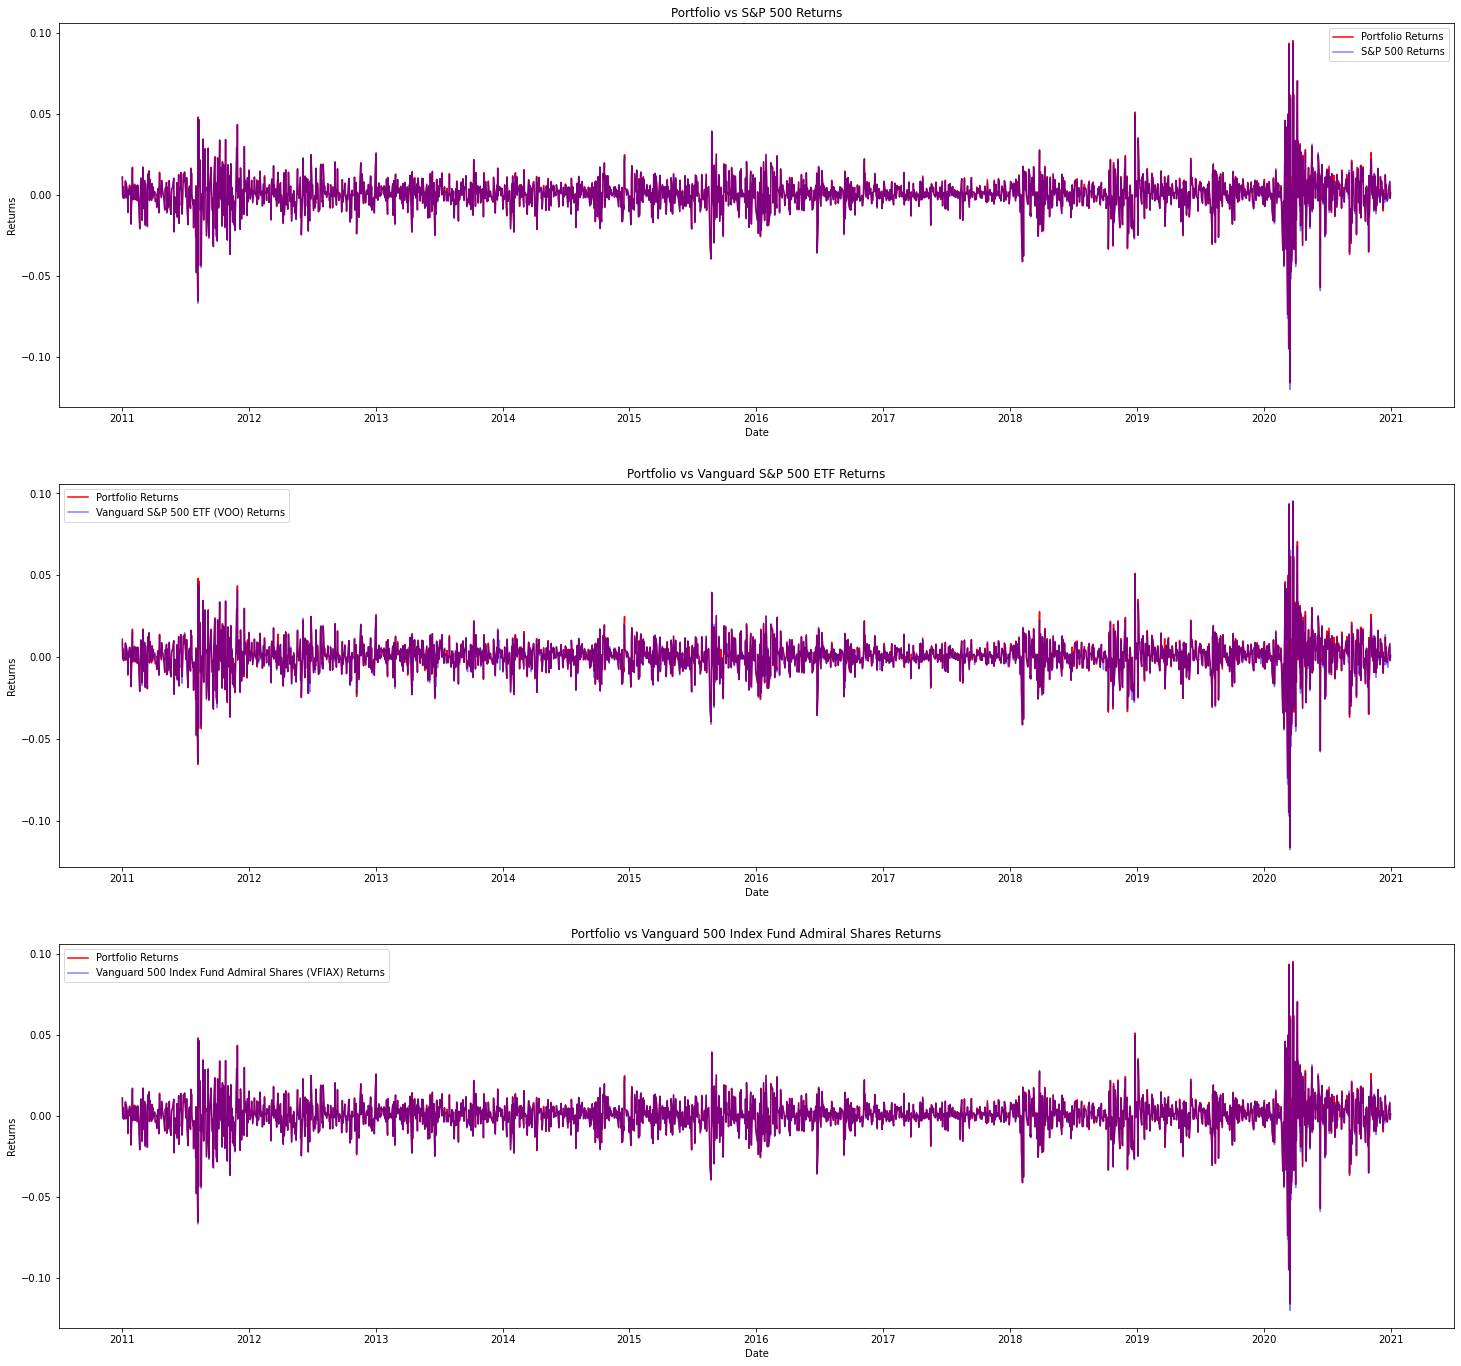

In [12]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 3, ncols = 1, figsize = (25,24))

ax1.plot(df_returns['Date'], df_returns['Portfolio_Return'], color = 'r', label = 'Portfolio Returns')
ax1.plot(df_returns['Date'], df_returns['S&P_500_Return'], color = 'b', alpha = 0.5, label = 'S&P 500 Returns')
ax1.legend()
ax1.set_title('Portfolio vs S&P 500 Returns')
ax1.set_xlabel('Date')
ax1.set_ylabel('Returns')

ax2.plot(df_returns['Date'], df_returns['Portfolio_Return'], color = 'r', label = 'Portfolio Returns')
ax2.plot(df_returns['Date'], df_returns['VOO_Return'], color = 'b', alpha = 0.5, label = 'Vanguard S&P 500 ETF (VOO) Returns')
ax2.legend()
ax2.set_title('Portfolio vs Vanguard S&P 500 ETF Returns')
ax2.set_xlabel('Date')
ax2.set_ylabel('Returns')

ax3.plot(df_returns['Date'], df_returns['Portfolio_Return'], color = 'r', label = 'Portfolio Returns')
ax3.plot(df_returns['Date'], df_returns['VFIAX_Return'], color = 'b', alpha = 0.5, label = 'Vanguard 500 Index Fund Admiral Shares (VFIAX) Returns')
ax3.legend()
ax3.set_title('Portfolio vs Vanguard 500 Index Fund Admiral Shares Returns')
ax3.set_xlabel('Date')
ax3.set_ylabel('Returns')

plt.show()

### Tracking Errors

Tracking error vs. S&P 500 for 10 years is:  0.0554 %
Tracking error vs. Vanguard S&P 500 ETF (VOO) for 10 years is: 0.1034 %
Tracking error vs. Vanguard 500 Index Fund Admiral Shares (VFIAX) is: 0.0538 %


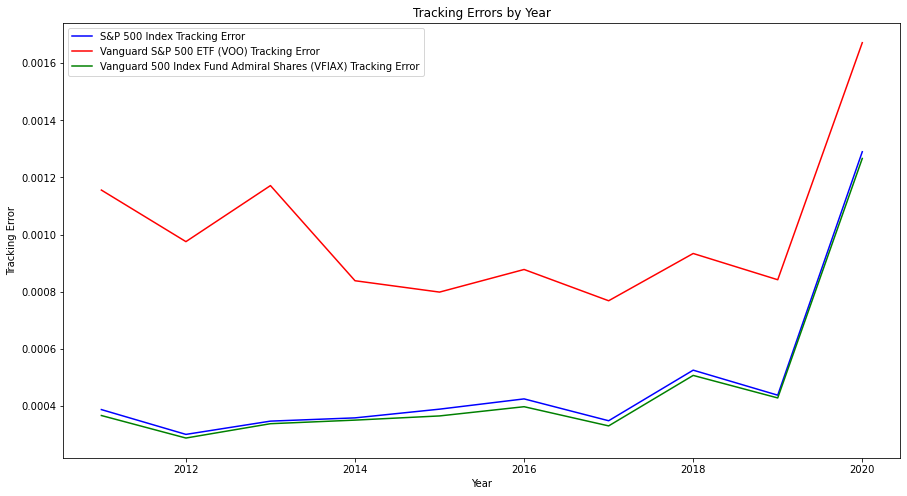

In [13]:
def custom_agg(series):
      return (sum(series**2)/(len(series)-1))**0.5
    
df_return_error = df_returns.groupby('Year').agg({'S&P_500_Return_Error': custom_agg, 'VOO_Return_Error': custom_agg, 'VFIAX_Return_Error': custom_agg})

print('Tracking error vs. S&P 500 for 10 years is: ', round(custom_agg(df_returns['S&P_500_Return_Error'])*100, 4), '%')
print('Tracking error vs. Vanguard S&P 500 ETF (VOO) for 10 years is:', round(custom_agg(df_returns['VOO_Return_Error'])*100, 4), '%')
print('Tracking error vs. Vanguard 500 Index Fund Admiral Shares (VFIAX) is:', round(custom_agg(df_returns['VFIAX_Return_Error'])*100, 4), '%')

fig, (ax) = plt.subplots(nrows = 1, ncols = 1, figsize = (15,8))
ax.plot(df_return_error['S&P_500_Return_Error'], color = 'b', label = 'S&P 500 Index Tracking Error')
ax.plot(df_return_error['VOO_Return_Error'], color = 'r', label = 'Vanguard S&P 500 ETF (VOO) Tracking Error')
ax.plot(df_return_error['VFIAX_Return_Error'], color = 'g', label = 'Vanguard 500 Index Fund Admiral Shares (VFIAX) Tracking Error')
ax.legend()
ax.set_title('Tracking Errors by Year')
ax.set_xlabel('Year')
ax.set_ylabel('Tracking Error')
plt.show()

### Most Overestimated and Underestimated Days

In [14]:
# show the most overestimated days
df_returns.dropna(how = 'any').sort_values(by = 'S&P_500_Return_Error', ascending= False).head()

,Date,Portfolio_Return,S&P_500_Return,VOO_Return,VFIAX_Return,S&P_500_Return_Error,VOO_Return_Error,VFIAX_Return_Error,Year,S&P_500_Index,Portfolio_Index,VOO_Index,VFIAX_Index
2317,2020-03-19,0.011030,0.004708,0.000863,0.004747,0.006322,0.010166,0.006283,2020,1894.372862,2889.836183,1895.887111,2286.932418
2319,2020-03-23,-0.024509,-0.029294,-0.030701,-0.029297,0.004785,0.006192,0.004788,2020,1759.145306,2703.440987,1757.614868,2124.043071
2316,2020-03-18,-0.047400,-0.051831,-0.054663,-0.051783,0.004431,0.007263,0.004383,2020,1885.495947,2858.310351,1894.252194,2276.127769
2477,2020-11-04,0.026216,0.022047,0.022517,0.022044,0.004169,0.003699,0.004172,2020,2707.391415,4525.528732,2715.625452,3303.475635
2314,2020-03-16,-0.115854,-0.119841,-0.117388,-0.119767,0.003987,0.001534,0.003912,2020,1876.084621,2826.302252,1880.657460,2265.014681


In [15]:
# show the most underestimated days
df_returns.dropna(how = 'any').sort_values(by = 'S&P_500_Return_Error', ascending= True).head()

,Date,Portfolio_Return,S&P_500_Return,VOO_Return,VFIAX_Return,S&P_500_Return_Error,VOO_Return_Error,VFIAX_Return_Error,Year,S&P_500_Index,Portfolio_Index,VOO_Index,VFIAX_Index
2436,2020-09-08,-0.029780,-0.027756,-0.027476,-0.027708,-0.002024,-0.002304,-0.002072,2020,2619.650935,4292.431344,2634.400361,3189.929910
2501,2020-12-09,-0.009739,-0.007949,-0.008878,-0.007908,-0.001790,-0.000861,-0.001831,2020,2887.735466,4897.091501,2900.877732,3531.040696
2433,2020-09-02,0.013742,0.015366,0.014567,0.015442,-0.001624,-0.000825,-0.001701,2020,2815.425950,4630.431228,2828.600843,3427.480726
2454,2020-10-02,-0.011114,-0.009572,-0.009302,-0.009552,-0.001542,-0.001812,-0.001562,2020,2632.702625,4356.769767,2639.132679,3209.271733
2287,2020-02-05,0.009863,0.011251,0.011308,0.011291,-0.001388,-0.001445,-0.001427,2020,2621.888997,3878.864636,2631.646963,3156.946032


## DJIA (Dow Jones Industrial Average) Tracker

### Data Reading and Preprocessing

In [16]:
# Read Daily Stock Data

df = df_daily_stocks
df.tail()

,PERMNO,date,SHRCD,EXCHCD,TICKER,COMNAM,PERMCO,DIVAMT,PRC,SHROUT,...,ewretd,sprtrn,day,month,year,Adjusted_Price,Adjusted_Shares,Market_Cap,Prev_Adjusted_Price,Return
9376438,93436,20201224,11,3,TSLA,TESLA INC,53453,NaN,661.77002,947901.0,...,-0.000277,0.003537,24,12,2020,661.77002,947901.0,6.272925e+08,645.97998,0.024444
9376439,93436,20201228,11,3,TSLA,TESLA INC,53453,NaN,663.69000,947901.0,...,0.001350,0.008723,28,12,2020,663.69000,947901.0,6.291124e+08,661.77002,0.002901
9376440,93436,20201229,11,3,TSLA,TESLA INC,53453,NaN,665.98999,947901.0,...,-0.008483,-0.002227,29,12,2020,665.98999,947901.0,6.312926e+08,663.69000,0.003465
9376441,93436,20201230,11,3,TSLA,TESLA INC,53453,NaN,694.78003,947901.0,...,0.010155,0.001342,30,12,2020,694.78003,947901.0,6.585827e+08,665.98999,0.043229
9376442,93436,20201231,11,3,TSLA,TESLA INC,53453,NaN,705.66998,947901.0,...,-0.001058,0.006439,31,12,2020,705.66998,947901.0,6.689053e+08,694.78003,0.015674


In [17]:
#Calculate Market Value based on the adjusted price and share
df['Adj Price'] = df['PRC'] / df['CFACPR']
df['Adj Share'] = df['SHROUT'] * df['CFACSHR']
df['Market Value'] = df['Adj Price'] * df['Adj Share']
df['Mkt Val'] = abs(df['PRC']) * df['SHROUT']

df.tail()

,PERMNO,date,SHRCD,EXCHCD,TICKER,COMNAM,PERMCO,DIVAMT,PRC,SHROUT,...,year,Adjusted_Price,Adjusted_Shares,Market_Cap,Prev_Adjusted_Price,Return,Adj Price,Adj Share,Market Value,Mkt Val
9376438,93436,20201224,11,3,TSLA,TESLA INC,53453,NaN,661.77002,947901.0,...,2020,661.77002,947901.0,6.272925e+08,645.97998,0.024444,661.77002,947901.0,6.272925e+08,6.272925e+08
9376439,93436,20201228,11,3,TSLA,TESLA INC,53453,NaN,663.69000,947901.0,...,2020,663.69000,947901.0,6.291124e+08,661.77002,0.002901,663.69000,947901.0,6.291124e+08,6.291124e+08
9376440,93436,20201229,11,3,TSLA,TESLA INC,53453,NaN,665.98999,947901.0,...,2020,665.98999,947901.0,6.312926e+08,663.69000,0.003465,665.98999,947901.0,6.312926e+08,6.312926e+08
9376441,93436,20201230,11,3,TSLA,TESLA INC,53453,NaN,694.78003,947901.0,...,2020,694.78003,947901.0,6.585827e+08,665.98999,0.043229,694.78003,947901.0,6.585827e+08,6.585827e+08
9376442,93436,20201231,11,3,TSLA,TESLA INC,53453,NaN,705.66998,947901.0,...,2020,705.66998,947901.0,6.689053e+08,694.78003,0.015674,705.66998,947901.0,6.689053e+08,6.689053e+08


In [18]:
#get the quarter_dates and year_dates
dates = df['date'].unique()
year_dates = dates[::251]
quarter_dates = dates[::62]
year_dates
quarter_dates
quarter_dates[:5]

array([20101231, 20110331, 20110629, 20110927, 20111223], dtype=int64)

Read DJIA Index Daily Data

In [19]:
yahooDJ = pd.read_csv('DJI_Index_Data.csv')
yahooDJ = yahooDJ['Close'].tolist()
yahooDJ[:5]

[11577.51, 11670.75, 11691.18, 11722.89, 11697.31]

Read Daily Data for chosen comparison ETF

Comparison ETF: **SPDR Dow Jones Industrial Average ETF Trust (DIA)**

In [20]:
yahooDIA = pd.read_csv('DIA_Stock_Data_DJI_ETF.csv')
yahooDIA = yahooDIA['Close'].tolist()
yahooDIA[:5]

[115.63, 116.410004, 116.639999, 117.040001, 116.779999]

Read Daily Data for chosen comparison Mutual Fund

Comparison ETF: **Fidelity Total Market Index Fund (FSKAX)**

In [21]:
yahooFSKAX = pd.read_csv('FSKAX_Stock_Data_DJI_MF.csv')
yahooFSKAX = yahooFSKAX[['Date', 'Close']]
yahooFSKAX['Date'] = pd.to_datetime(yahooFSKAX['Date'], format='%Y-%m-%d')
yahooFSKAX[:5]

,Date,Close
0,2011-09-09,33.560001
1,2011-09-12,33.790001
2,2011-09-13,34.150002
3,2011-09-14,34.639999
4,2011-09-15,35.209999


### Full Replication - Manually input the Dow Jones tickers

In [22]:
#count for every company that has been covered in Dow Jones
# 23 common components from 2010.12 to 2020.12
ticker_common = ['MMM','AXP','BA','CAT','CVX','CSCO','KO','DIS','XOM','HD','IBM','INTC','JNJ','JPM','MCD','MRK','MSFT','PFE','PG','TRV','UTX','VZ','WMT']
# ticker_2012 means the reconstituted tickers at the end of 2012, used to track in 2013.
ticker_2010 = ['AA','GE','T','BAC','KFT','HPQ','DD'] + ticker_common
ticker_2012 = ['AA','GE','T','BAC','HPQ','DD','UNH'] + ticker_common
ticker_2013 = ['GE','T','DD','UNH','NKE','GS','V'] + ticker_common
ticker_2015 = ['GE','DD','UNH','NKE','GS','V','AAPL'] + ticker_common
ticker_2017 = ['GE','UNH','NKE','GS','V','AAPL','DWDP'] + ticker_common
ticker_2018 = ['UNH','NKE','GS','V','AAPL','DWDP','WBA'] + ticker_common
ticker_2019 = ['UNH','NKE','GS','V','AAPL','WBA','DOW'] + ticker_common

a = df[df['TICKER'].isin((ticker_2010+ticker_2019))]
# DWDP and DD is the same company
# KFT changed to other ticker in 2012, but it was removed from 500 at that time
# WBA created in 2014, it was added to 500 in 2018, doesn't matter

### Reconstitution (Annually) and Rebalancing (Quarterly)

In [23]:
yahooDJ_table = pd.read_csv('DJI_Index_Data.csv')

ticker_2011 = ticker_2010
ticker_2014 = ticker_2013
ticker_2016 = ticker_2017

ticker_list = []
ticker_list.append([ticker_2010, ticker_2011, ticker_2012, ticker_2013, ticker_2014, ticker_2015, ticker_2016, ticker_2017, ticker_2018, ticker_2019])

def divisor_function(date):
    year = ((date % 100000000) / 10000).astype(int)
    if year == 2010:
        ticker = ticker_list[0][0]
    elif year == 2020:
        ticker = ticker_list[0][9]
    else:
        month = ((date % 10000) / 100).astype(int)
        if month == 12:
            year = year + 1
        ticker = ticker_list[0][year - 2011]
        
    df20 = df[df['TICKER'].isin(ticker)][df['date'] == date]
    df20['weight'] = df20['Adj Price']/df20['Adj Price'].sum()
    df20['DJIA'] = df20['weight'] * df20['Adj Price']
    dj = yahooDJ_table[yahooDJ_table['Date'] == datetime.strptime(str(date), '%Y%m%d').strftime('%Y-%m-%d')]['Close'].iloc[0]
    divisor = dj / df20['DJIA'].sum()
    return (divisor,ticker)

In [24]:
#Rebalance every quarter
def DJIA_rebalance(ticker, date):
    df0 = df[df['TICKER'].isin(ticker)][df['date'] == date]
    df0['weight'] = df0['Adj Price']/df0['Adj Price'].sum()
    df1 = pd.merge(df0[['PERMNO','weight']], df,  how='right', left_on=['PERMNO'], right_on = ['PERMNO'])
    return df1

In [25]:
#Use the weight to calculate the weighted sum and get the predicted index
def DJIA_month(temp, ticker, date):
    df0 = temp[temp['TICKER'].isin(ticker)][df['date'] == date]
    #df0['weight'] = df0['Adj price']/df0['Adj price'].sum()
    df0['DJIA'] = df0['weight'] * df0['Adj Price']
    x = df0['DJIA'].sum() * divisor
    return x

In [26]:
DJIA = []

for date in dates:
    if date in quarter_dates:
        divisor = divisor_function(date)[0]
        temp_weights = DJIA_rebalance(divisor_function(date)[1], date)

    DJIA.append(DJIA_month(temp_weights, divisor_function(date)[1], date))

DJIA[:10]

[11577.51,
 11667.231192595586,
 11672.232092651586,
 11687.651671645472,
 11678.432065896879,
 11660.631133676185,
 11625.903034884543,
 11658.901963863025,
 11747.220491531965,
 11724.905406317102]

### Return, Index, and Return Error Calculation

In [27]:
from datetime import datetime
new_dates = []
for date in dates:
    new_dates.append(datetime.strptime(str(date), '%Y%m%d'))

new_dates[:10]

[datetime.datetime(2010, 12, 31, 0, 0),
 datetime.datetime(2011, 1, 3, 0, 0),
 datetime.datetime(2011, 1, 4, 0, 0),
 datetime.datetime(2011, 1, 5, 0, 0),
 datetime.datetime(2011, 1, 6, 0, 0),
 datetime.datetime(2011, 1, 7, 0, 0),
 datetime.datetime(2011, 1, 10, 0, 0),
 datetime.datetime(2011, 1, 11, 0, 0),
 datetime.datetime(2011, 1, 12, 0, 0),
 datetime.datetime(2011, 1, 13, 0, 0)]

In [28]:
d = {'Date':new_dates,'DJIA':DJIA}
df_DJIA = pd.DataFrame(d)
df_DJIA.tail()

,Date,DJIA
2513,2020-12-24,30025.446634
2514,2020-12-28,30274.800997
2515,2020-12-29,30189.587415
2516,2020-12-30,30218.916063
2517,2020-12-31,30436.106321


In [29]:
p = {'Date':new_dates,'DJIA':yahooDJ, 'Replicate':DJIA, 'ETF':yahooDIA}
p = pd.DataFrame(p)
p['ETF'] = p['DJIA'][0] * p['ETF'] / p['ETF'][0] 
p = p.merge(yahooFSKAX, left_on = 'Date', right_on = 'Date', how = 'left').rename(columns = {'Close': 'MF'})
mf_start = p[~p['MF'].isnull()].index[0]
p['MF'] = p['DJIA'][mf_start] * p['MF'] / p['MF'][mf_start] 
p.head()


,Date,DJIA,Replicate,ETF,MF
0,2010-12-31,11577.51,11577.510000,11577.510000,NaN
1,2011-01-03,11670.75,11667.231193,11655.608280,NaN
2,2011-01-04,11691.18,11672.232093,11678.636641,NaN
3,2011-01-05,11722.89,11687.651672,11718.687036,NaN
4,2011-01-06,11697.31,11678.432066,11692.654209,NaN


In [30]:
p['DJIA_return'] = p['DJIA']/p['DJIA'].shift(1) - 1
p['Replicate_return'] = p['Replicate']/p['Replicate'].shift(1) - 1
p['ETF_return'] = p['ETF']/p['ETF'].shift(1) - 1
p['MF_return'] = p['MF']/p['MF'].shift(1) - 1
p['Tracking Error vs. DJIA'] = p['Replicate_return'] - p['DJIA_return']
p['Tracking Error vs. DIA'] = p['Replicate_return'] - p['ETF_return']
p['Tracking Error vs. FSKAX'] = p['Replicate_return'] - p['MF_return']
p['Year'] = pd.to_datetime(p['Date']).dt.year
p.head()

,Date,DJIA,Replicate,ETF,MF,DJIA_return,Replicate_return,ETF_return,MF_return,Tracking Error vs. DJIA,Tracking Error vs. DIA,Tracking Error vs. FSKAX,Year
0,2010-12-31,11577.51,11577.510000,11577.510000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2010
1,2011-01-03,11670.75,11667.231193,11655.608280,NaN,0.008054,0.007750,0.006746,NaN,-0.000304,0.001004,NaN,2011
2,2011-01-04,11691.18,11672.232093,11678.636641,NaN,0.001751,0.000429,0.001976,NaN,-0.001322,-0.001547,NaN,2011
3,2011-01-05,11722.89,11687.651672,11718.687036,NaN,0.002712,0.001321,0.003429,NaN,-0.001391,-0.002108,NaN,2011
4,2011-01-06,11697.31,11678.432066,11692.654209,NaN,-0.002182,-0.000789,-0.002221,NaN,0.001393,0.001433,NaN,2011


### Portfolio Index Comparison

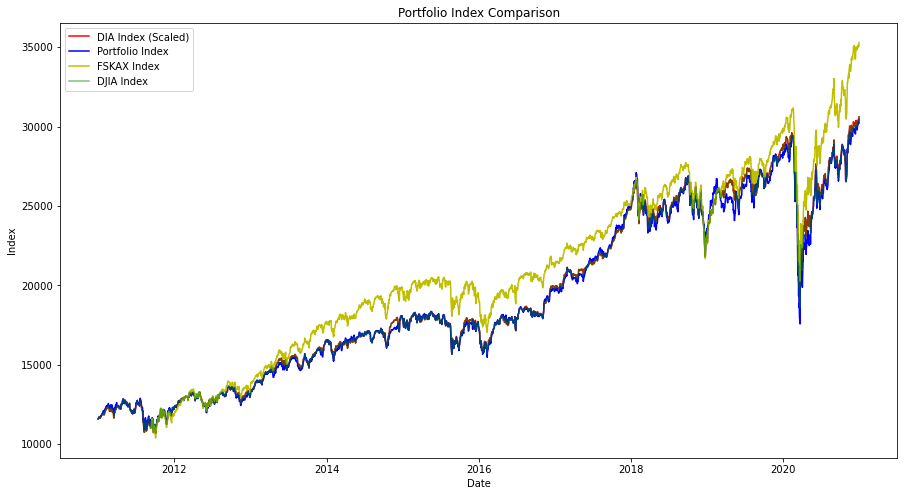

In [31]:
#Plot the portfolio index vs. dow jones index
fig, (ax) = plt.subplots(nrows = 1, ncols = 1, figsize = (15,8))

ax.plot(new_dates, p['ETF'], color = 'r', label = 'DIA Index (Scaled)')
ax.plot(new_dates, p['Replicate'], color = 'b', label = 'Portfolio Index')
ax.plot(new_dates, p['MF'], color = 'y', label = 'FSKAX Index')
ax.plot(new_dates, p['DJIA'], color = 'g', alpha = 0.5, label = 'DJIA Index')

ax.legend()
ax.set_title('Portfolio Index Comparison')
ax.set_xlabel('Date')
ax.set_ylabel('Index')
plt.show()

### Portfolio Returns Comparison

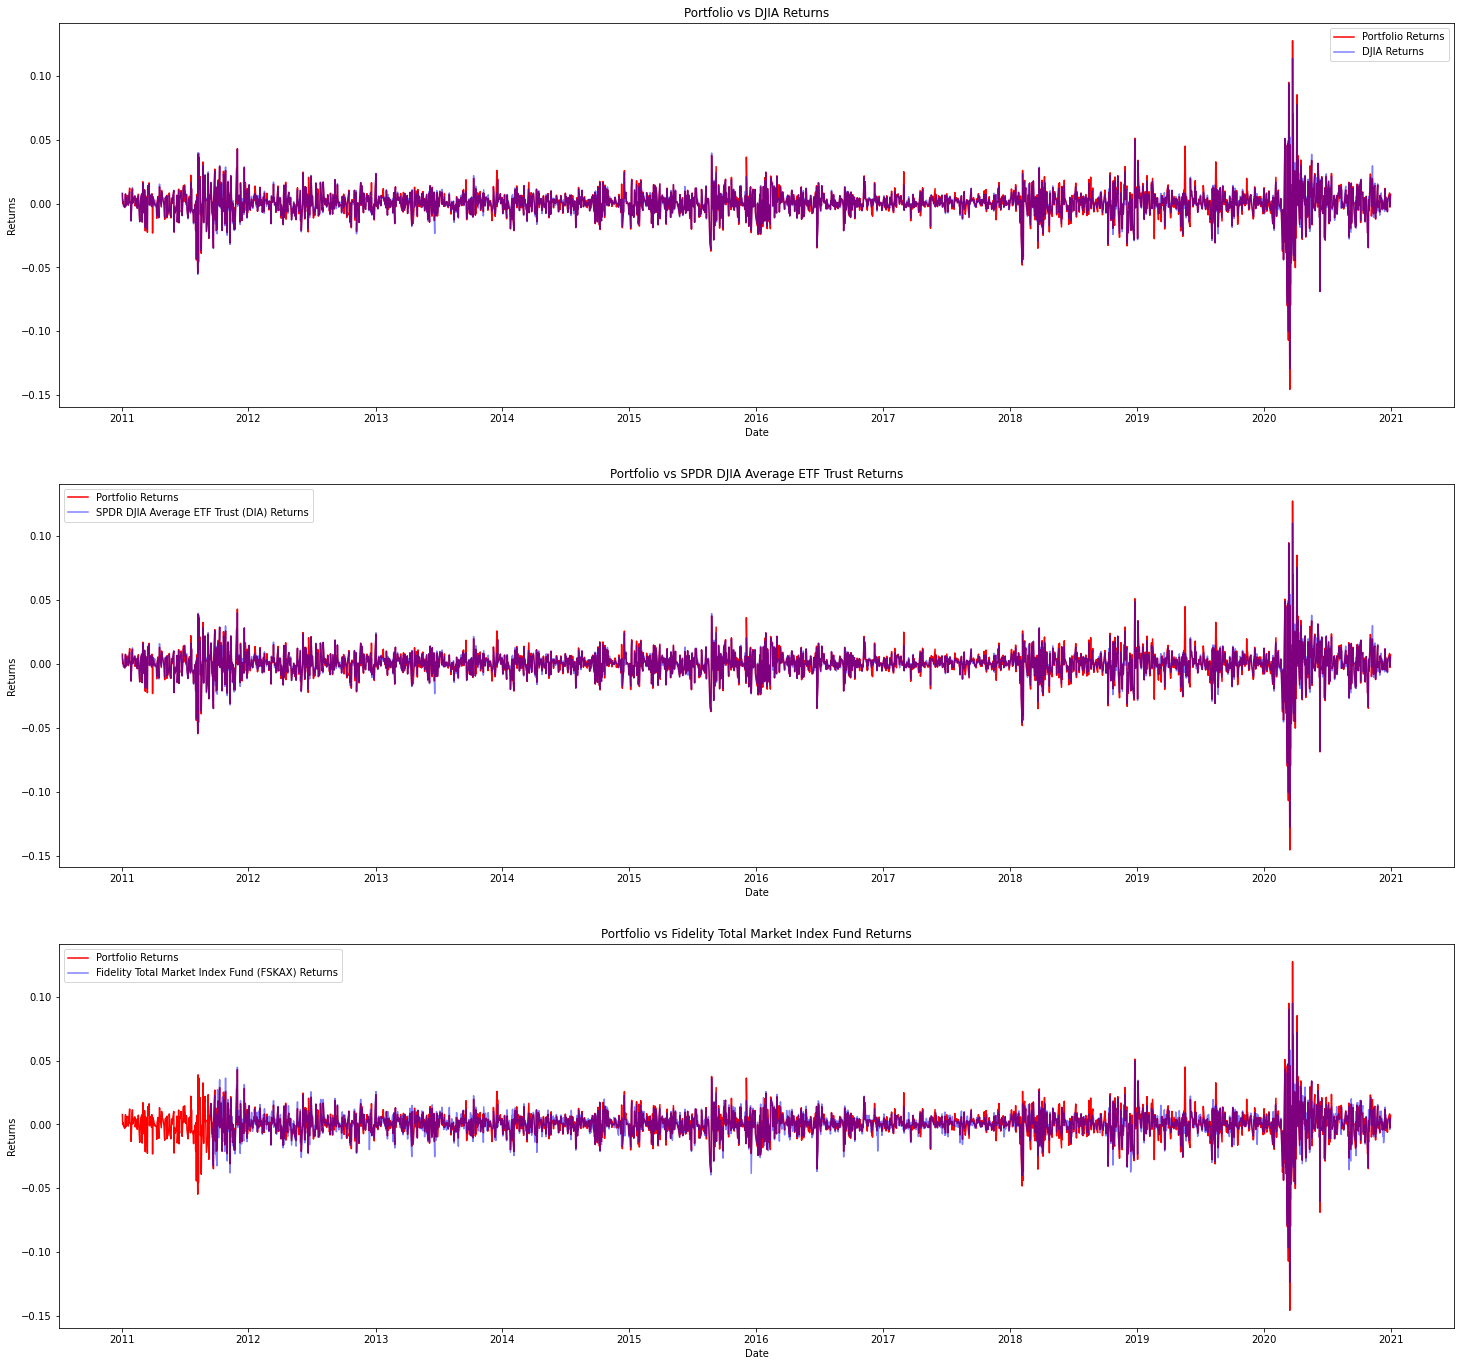

In [32]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 3, ncols = 1, figsize = (25,24))

ax1.plot(p['Date'], p['Replicate_return'], color = 'r', label = 'Portfolio Returns')
ax1.plot(p['Date'], p['DJIA_return'], color = 'b', alpha = 0.5, label = 'DJIA Returns')
ax1.legend()
ax1.set_title('Portfolio vs DJIA Returns')
ax1.set_xlabel('Date')
ax1.set_ylabel('Returns')

ax2.plot(p['Date'], p['Replicate_return'], color = 'r', label = 'Portfolio Returns')
ax2.plot(p['Date'], p['ETF_return'], color = 'b', alpha = 0.5, label = 'SPDR DJIA Average ETF Trust (DIA) Returns')
ax2.legend()
ax2.set_title('Portfolio vs SPDR DJIA Average ETF Trust Returns')
ax2.set_xlabel('Date')
ax2.set_ylabel('Returns')

ax3.plot(p['Date'], p['Replicate_return'], color = 'r', label = 'Portfolio Returns')
ax3.plot(p['Date'], p['MF_return'], color = 'b', alpha = 0.5, label = 'Fidelity Total Market Index Fund (FSKAX) Returns')
ax3.legend()
ax3.set_title('Portfolio vs Fidelity Total Market Index Fund Returns')
ax3.set_xlabel('Date')
ax3.set_ylabel('Returns')

plt.show()

### Tracking Errors

In [33]:
def custom_agg(series):
    series = series.dropna()
    return (sum(series**2)/(len(series)-1))**0.5

p_return_error = p[p['Year'] > 2010].groupby('Year').agg({'Tracking Error vs. DJIA': custom_agg, 'Tracking Error vs. DIA': custom_agg, 'Tracking Error vs. FSKAX': custom_agg})
p_return_error2 = p[p['Year'] > 2010].agg({'Tracking Error vs. DJIA': custom_agg, 'Tracking Error vs. DIA': custom_agg, 'Tracking Error vs. FSKAX': custom_agg})

print('Tracking Errors per Year:')
p_return_error

Tracking Errors per Year:


,Tracking Error vs. DJIA,Tracking Error vs. DIA,Tracking Error vs. FSKAX
Year,,,
2011,0.002406,0.002579,0.005623
2012,0.001989,0.002129,0.003549
2013,0.002621,0.002676,0.004066
2014,0.002427,0.002459,0.003633
2015,0.001455,0.001595,0.002730
2016,0.001637,0.001765,0.003208
2017,0.001810,0.001883,0.003243
2018,0.002943,0.003050,0.005006
2019,0.004711,0.004815,0.006039


Tracking error vs. Dow Jones Index for 10 years is: 0.2886 %
Tracking error vs. SPDR DJIA Average ETF Trust (DIA) for 10 years is: 0.2982 %
Tracking error vs. Fidelity Total Market Index Fund (FSKAX) for 10 years is: 0.4486 %


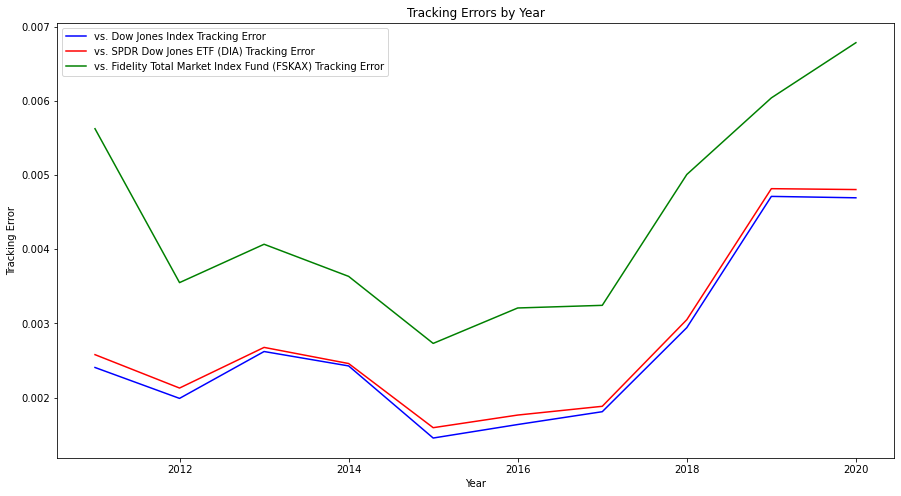

In [34]:
print('Tracking error vs. Dow Jones Index for 10 years is:', round(p_return_error2[0] * 100, 4), '%')
print('Tracking error vs. SPDR DJIA Average ETF Trust (DIA) for 10 years is:', round(p_return_error2[1] * 100, 4), '%')
print('Tracking error vs. Fidelity Total Market Index Fund (FSKAX) for 10 years is:', round(p_return_error2[2] * 100, 4), '%')

#Plot the tracking errors
fig, (ax) = plt.subplots(nrows = 1, ncols = 1, figsize = (15,8))
ax.plot(p_return_error['Tracking Error vs. DJIA'], color = 'b', label = 'vs. Dow Jones Index Tracking Error')
ax.plot(p_return_error['Tracking Error vs. DIA'], color = 'r', label = 'vs. SPDR Dow Jones ETF (DIA) Tracking Error')
ax.plot(p_return_error['Tracking Error vs. FSKAX'], color = 'g', label = 'vs. Fidelity Total Market Index Fund (FSKAX) Tracking Error')
ax.legend()
ax.set_title('Tracking Errors by Year')
ax.set_xlabel('Year')
ax.set_ylabel('Tracking Error')
plt.show()

### Most Overestimated and Underestimated Days

In [35]:
#Show the most overestimation days
p.dropna(how = 'any').sort_values(by = 'Tracking Error vs. DJIA', ascending= False).head()

,Date,DJIA,Replicate,ETF,MF,DJIA_return,Replicate_return,ETF_return,MF_return,Tracking Error vs. DJIA,Tracking Error vs. DIA,Tracking Error vs. FSKAX,Year
2356,2020-05-13,23247.97,23247.97,23311.216460,25639.567931,-0.021747,0.029414,-0.022093,-0.019539,0.051160,0.051507,0.048953,2020
2108,2019-05-20,25679.90,25679.90,25699.209913,26340.496015,-0.003264,0.044946,-0.002991,-0.006915,0.048211,0.047937,0.051862,2019
992,2014-12-10,17533.15,17533.15,17550.995822,19485.155429,-0.015058,0.015247,-0.015003,-0.017019,0.030305,0.030251,0.032266,2014
620,2013-06-20,14758.32,14758.32,14776.519493,15168.222173,-0.023416,-0.001130,-0.023231,-0.025258,0.022286,0.022101,0.024128,2013
2170,2019-08-16,25886.01,25886.01,25920.486437,26835.076998,0.011987,0.032595,0.009830,0.015367,0.020608,0.022765,0.017228,2019


In [36]:
#Show the most underestimation days
p.dropna(how = 'any').sort_values(by = 'Tracking Error vs. DJIA', ascending= True).head()

,Date,DJIA,Replicate,ETF,MF,DJIA_return,Replicate_return,ETF_return,MF_return,Tracking Error vs. DJIA,Tracking Error vs. DIA,Tracking Error vs. FSKAX,Year
2046,2019-02-20,25954.44,25954.440000,25982.563738,25973.656615,0.002438,-0.027531,0.002666,0.001895,-0.029968,-0.030197,-0.029426,2019
1798,2018-02-23,25309.99,25309.990000,25322.737182,25695.248505,0.013921,-0.009111,0.013708,0.015534,-0.023032,-0.022819,-0.024645,2018
2117,2019-06-03,24819.78,24447.859443,24881.183387,25472.523589,0.000191,-0.018014,0.001128,-0.002309,-0.018205,-0.019142,-0.015705,2019
186,2011-09-27,11190.69,11190.690000,11185.017993,11168.998804,0.013295,-0.004339,0.013335,0.012170,-0.017634,-0.017674,-0.016509,2011
2317,2020-03-18,19898.92,18593.492758,19964.020646,21489.679345,-0.063024,-0.079670,-0.065958,-0.058410,-0.016647,-0.013713,-0.021261,2020
